# Visual Area Segmentation

##### copied/adapted from:

https://github.com/zhuangjun1981/NeuroAnalysisTools/blob/master/NeuroAnalysisTools/RetinotopicMapping.py

##### Cite the original work/implementation:

[Zhuang et al., Elife (2017)](https://elifesciences.org/articles/18372)

In [1]:
# load packages:
import numpy as np
import sys
sys.path.append('../src')
import physion.utils.plot_tools as pt
from physion.intrinsic.tools import *
from physion.intrinsic.analysis import RetinotopicMapping
import matplotlib.pylab as plt
from PIL import Image

## Load data

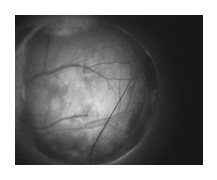

In [2]:
dataFolder = os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', 'SST', 'SST_F4', '12-59-33')
dataFolder = os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', 'PVNR1', 'PVNR1_M3', '14-55-55')
dataFolder = os.path.join(os.path.expanduser('~'), 'DATA', 'CIBELE', 'intrinsic_img', '2024_09_18', '16-15-18')
# retinotopic mapping data
maps = np.load(os.path.join(dataFolder, 'raw-maps.npy') , allow_pickle=True).item()
# vasculature picture
imVasc = np.array(Image.open(os.path.join(dataFolder, 'vasculature.tif')))
plt.imshow(imVasc**1, cmap=plt.cm.grey); plt.axis('off');

# Retinotopic Maps

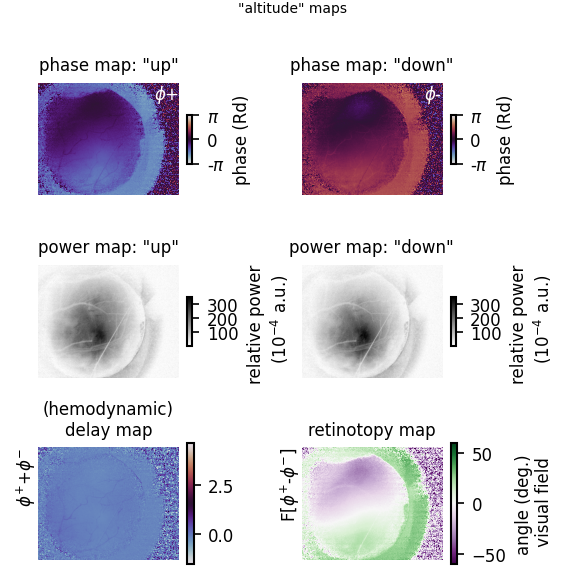

In [3]:
plot_retinotopic_maps(maps, map_type='altitude');

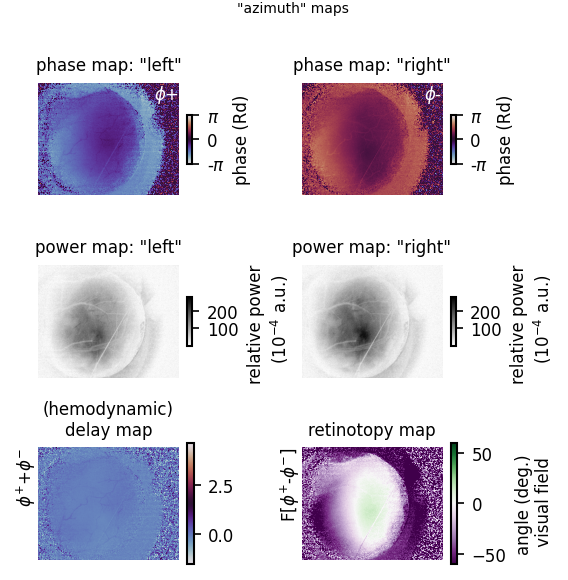

In [4]:
plot_retinotopic_maps(maps, map_type='azimuth');

# Perform Segmentation

In [7]:
data = build_trial_data(maps)
data['vasculatureMap'] = imVasc[::int(imVasc.shape[0]/data['aziPosMap'].shape[0]),\
                                ::int(imVasc.shape[1]/data['aziPosMap'].shape[1])]
segmentation_params={'phaseMapFilterSigma': 2.,
                     'signMapFilterSigma': 3.,
                     'signMapThr': 0.6,
                     'eccMapFilterSigma': 10.,
                     'splitLocalMinCutStep': 5.,
                     'mergeOverlapThr': 0.1,
                     'closeIter': 3,
                     'openIter': 3,
                     'dilationIter': 15,
                     'borderWidth': 1,
                     'smallPatchThr': 100,
                     'visualSpacePixelSize': 0.5,
                     'visualSpaceCloseIter': 15,
                     'splitOverlapThr': 1.1}
data['params'] = segmentation_params
trial = RetinotopicMapping.RetinotopicMappingTrial(**data)
trial.processTrial(isPlot=False) # TURN TO TRUE TO VISUALIZE THE SEGMENTATION STEPS

patch01AU=2960.25 AS=3011.749075969352 ratio=1.0173968671461369
patch02AU=242.75 AS=222.5410813537752 ratio=0.9167500776674571
patch03AU=267.5 AS=228.2158711283277 ratio=0.853143443470384
patch04AU=179.25 AS=157.84702462330554 ratio=0.8805970690282039
patch05AU=165.75 AS=181.8075892635328 ratio=1.096878366597483
patch06AU=98.5 AS=83.93951766386687 ratio=0.8521778443032169
patch07AU=33.75 AS=42.45060443581013 ratio=1.2577956869869666
Only one local minumum was found!!!
patch08AU=51.75 AS=46.30248678985332 ratio=0.8947340442483733
patch09AU=45.75 AS=45.496333303362626 ratio=0.9944553727510956
patch10AU=45.5 AS=42.16098002694025 ratio=0.9266149456470385
patch11AU=69.0 AS=83.28331465321712 ratio=1.2070045601915524
Only one local minumum was found!!!
patch12AU=43.75 AS=46.642785839398 ratio=1.0661208191862401
merge iteration: 1
merging: patch04 & patch12, overlap ratio: 0.0
merging: patch03 & patch09, overlap ratio: 0.00546448087431694
merging: patch02 & patch11, overlap ratio: 0.0289855072

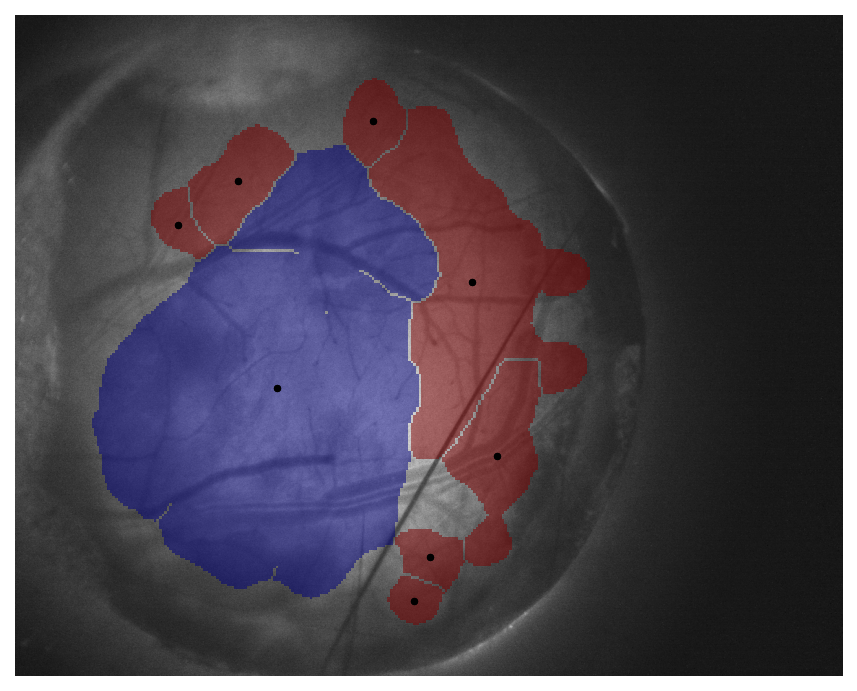

In [9]:
fig, ax = pt.figure(figsize=(5,5))
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), extent=[*ax.get_xlim(), *ax.get_ylim()])
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.axis('off');
#fig.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'fig.svg'))

# Summary Plot

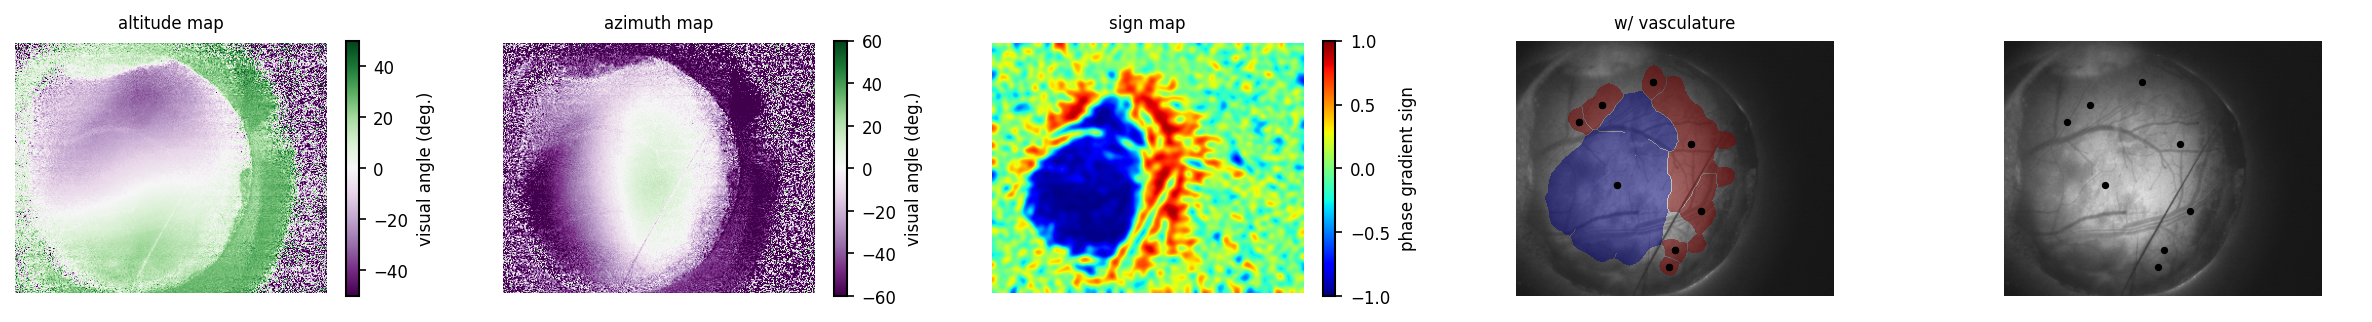

In [42]:
fig, AX = pt.figure(axes=(5,1), figsize=(.9*2,.9*3), wspace=0.4)

for map_type, ax, bounds in zip(['altitude', 'azimuth'], AX[:2],
                                [[-50, 50],[-60, 60]]):
    im = ax.imshow(maps['%s-retinotopy' % map_type], cmap=plt.cm.PRGn,\
                   vmin=bounds[0], vmax=bounds[1])
    fig.colorbar(im, ax=ax,
                 label='visual angle (deg.)')
    ax.set_title('%s map' % map_type)

ax = AX[2]
im = ax.imshow(trial.signMapf, cmap='jet', vmin=-1, vmax=1)
fig.colorbar(im, ax=ax, label='phase gradient sign')
ax.set_title('sign map')
    
ax=AX[-2]
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), 
          extent=[*ax.get_xlim(), *ax.get_ylim()])
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.set_title('w/ vasculature')

ax = AX[-1]
h = RetinotopicMapping.plotPatches(trial.finalPatches, plotaxis=ax)
ax.imshow(imVasc, cmap=plt.cm.grey, vmin=imVasc.min(), vmax=imVasc.max(), extent=[*ax.get_xlim(), *ax.get_ylim()])

for ax in AX:
    ax.axis('equal')
    ax.axis('off')    

#fig.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', 'fig.svg'))